<a href="https://colab.research.google.com/github/komzy/Beethoven-Piano-Music-Creator/blob/master/week-2/Session_4_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 278kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

! pip install koalas
!pip install loguru 

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark 
df = spark.createDataFrame([{"hello": "world"} for x in range(3)])

df.show(3, False)


     |████████████████████████████████| 1.4MB 6.6MB/s 
     |████████████████████████████████| 61kB 3.4MB/s 
+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+



In [3]:
from loguru import logger
logger.add("Getting_Started_Koalas_{time}.log")
import plotly 
logger.info(f'plotly_version{plotly.__version__}')


2021-04-28 16:25:39.339 | INFO     | __main__:<module>:4 - plotly_version4.14.3


In [4]:
import seaborn as sns
import databricks.koalas as ks
ks.set_option('compute.ops_on_diff_frames', True)

## Exploratory Data Analysis using Koalas


In [6]:
# Read the closing prices of stocks
kdf_stocks = ks.read_csv("dailyPrices_AtClose.csv")
kdf_stocks.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [7]:
# Read the X1 signal
kdf_X1 = ks.read_csv("X1Signals_AtClose.csv")
kdf_X1.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [8]:
# Read X2 Signal
kdf_X2 = ks.read_csv("X2Signals_AtClose.csv")
kdf_X2.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [9]:
print(kdf_stocks.shape)
print(kdf_X1.shape)
print(kdf_X2.shape)

(2771, 57)
(2769, 57)
(2769, 57)


In [10]:
#Drop records which are entirely null from stock closing prices
kdf_stocks=kdf_stocks.set_index('t()')
print(kdf_stocks.shape)
kdf_stocks=kdf_stocks.dropna(how='all')
kdf_stocks["Date"] = kdf_stocks.index
print(kdf_stocks.shape)

(2771, 56)
(2769, 57)


In [11]:
#Drop records which are entirely null from stock X1_signal
kdf_X1=kdf_X1.set_index('t()')
print(kdf_X1.shape)
kdf_X1=kdf_X1.dropna(how='all')
kdf_X1["Date"] = kdf_X1.index
print(kdf_X1.shape)

(2769, 56)
(2769, 57)


In [12]:
#Drop records which are entirely null from X2_signal
kdf_X2=kdf_X2.set_index('t()')
print(kdf_X2.shape)
kdf_X2=kdf_X2.dropna(how='all')
kdf_X2["Date"] = kdf_X2.index
print(kdf_X2.shape)

(2769, 56)
(1803, 57)


As both daily stock prices and X1_signal have the same number of non-null records and columns, it is assumed strong relation ship exists between them. Whereas, since X2_data is scarce, we cannot make any such assumptions as yet.

To test this theory we plot the signals and their correlation pairplot.

In [ ]:
kdf_stocks=kdf_stocks.sort_values(by=['Date'])
kdf_X1=kdf_X1.sort_values(by=['Date'])
kdf_X2=kdf_X2.sort_values(by=['Date'])

In [15]:
fig =ks.concat([kdf_stocks["X3"], kdf_X1["X3"].rename("X3_X1_signal"),
                kdf_X2["X3"].rename("X3_X2_signal")],axis=1).sort_index()
fig.plot.line()




In [14]:
kdf_X2.X3.plot.line() 

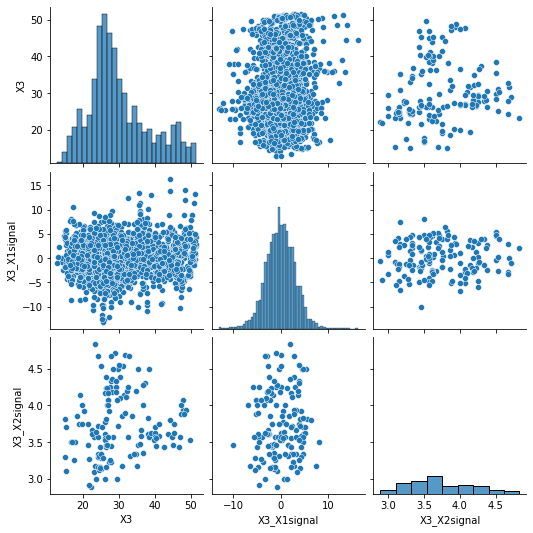

In [17]:
c= kdf_X1.X3.rename("X3_X1signal")
cc=kdf_X2.X3.rename("X3_X2signal")
pairplot =ks.concat([kdf_stocks["X3"], c, cc],axis=1)
sns.pairplot(pairplot.to_pandas())


In [21]:
print(kdf_stocks.shape)
print(kdf_X1.shape)
print(kdf_X2.shape)

(2769, 57)
(2769, 57)
(1803, 57)


Looks like daily stock prices and X1_signal are correlated. Daily stock prices and X2_signal do not demonstrate any obvious relationship. There seems to exist a relationship between X1_signal and X2_signal as well. However as X2_signal data is sparse and shows negligible relationship with daily stock prices, I have simplified the problem by limiting myself to dailyPrices and X1_signal.

Now we investigate the correlation in time between the the past stock price values and the current price.

In [38]:
kdf_stocks_X3=kdf_stocks.loc[:, ['Date', 'X3']]

print(kdf_stocks_X3.shape)
kdf_stocks_X3=ks.concat([kdf_stocks_X3,  #actual stock price
                         kdf_stocks_X3.X3.shift().rename("1"),  #stock price just a day before
                         kdf_stocks_X3.X3.shift(2).rename("2"), #stock price two days ago
                         kdf_stocks_X3.X3.shift(3).rename("3"), #stock price three days ago
                         kdf_stocks_X3.X3.shift(4).rename("4"),
                         kdf_stocks_X3.X3.shift(5).rename("5"),                         
                         kdf_stocks_X3.X3.shift(6).rename("6"),
                         kdf_stocks_X3.X3.shift(7).rename("7"),                       
                         kdf_stocks_X3.X3.shift(8).rename("8"), 
                         kdf_stocks_X3.X3.shift(9).rename("9"), 
                         kdf_stocks_X3.X3.shift(10).rename("10"), #stock price ten days ago
                         kdf_X1.X3.rename("X3_X1signal"), #actual X1_signal 
                         kdf_X1.X3.shift().rename("X3_X1signal_1"),  #X1_signal just a day before
                         kdf_X1.X3.shift(2).rename("X3_X1signal_2"), #X1_signal two days ago
                         kdf_X1.X3.shift(3).rename("X3_X1signal_3"), #X1_signal three days ago
                         kdf_X1.X3.shift(4).rename("X3_X1signal_4"),
                         kdf_X1.X3.shift(5).rename("X3_X1signal_5"),
                         kdf_X1.X3.shift(6).rename("X3_X1signal_6"),
                         kdf_X1.X3.shift(7).rename("X3_X1signal_7"),
                         kdf_X1.X3.shift(8).rename("X3_X1signal_8"),
                         kdf_X1.X3.shift(9).rename("X3_X1signal_9"),
                         kdf_X1.X3.shift(10).rename("X3_X1signal_10")],axis=1).sort_values(by=['Date'])                                    
                                   

kdf_stocks_X3=kdf_stocks_X3.iloc[10:]  #drop the first 9 rows that have NAN due to shifting function

print(kdf_stocks_X3.shape)


(2769, 2)
(2759, 23)


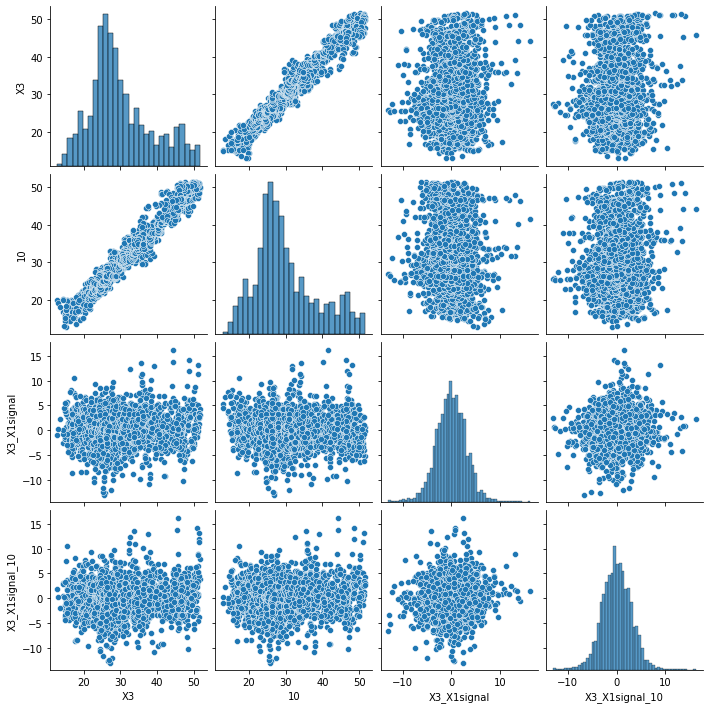

In [39]:
# investigating the relationship between daily stock prices and prices 10 days ago
# also the relationship between actual X1_signal and X1_signal from 10 days ago
relationship_withpast =ks.concat([kdf_stocks_X3.X3, kdf_stocks_X3['10'],
                                  kdf_stocks_X3['X3_X1signal'],kdf_stocks_X3['X3_X1signal_10'],],axis=1)
relationship_withpast.plot.line()
sns.pairplot(relationship_withpast.to_pandas())
#type(fig)



HIGH CORRELATION between daily stock value and value from 10 days ago. NO correlation between X1_signal and X1_signal_10. However, some correlation between X1_signal_10 & daily stock price and stock price from 10 days ago & X1_signal. 



## Model Building using PySpark
'X3' is the actual price of the stock. Whereas 'prediction' is the predicted values of this stock. We assume the value of X1_signal for that day is available to us. We also have the past 10 values of the stock price and past X1_signal values available to us. We will use the X1_signal, past X1_signal values and past stock prices to predict our actual stock price. 

In [42]:
# Convert the Koalas DataFrame into Spark DataFrame
sdf = kdf_stocks_X3.to_spark()

In [43]:
sdf.show(5,False)

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+
|Date      |X3       |1        |2        |3        |4        |5        |6        |7        |8        |9        |10       |X3_X1signal|X3_X1signal_1|X3_X1signal_2|X3_X1signal_3|X3_X1signal_4|X3_X1signal_5|X3_X1signal_6|X3_X1signal_7|X3_X1signal_8|X3_X1signal_9|X3_X1signal_10|
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+
|2005-01-18|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|17.034457|17.329738|17.521205|3.309626   |0.620202     |1.704702     |-0.547576 

We will now predict the price of the stock for the next day using data from the past 10 days and X1_signal

In [44]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

In [66]:
# Create the feature column using VectorAssembler class
vectorAssembler = VectorAssembler(inputCols =["1","2","3","4","5","6","7","8","9","10",
                                              "X3_X1signal","X3_X1signal_1","X3_X1signal_2",
                                              "X3_X1signal_3","X3_X1signal_4","X3_X1signal_5",
                                              "X3_X1signal_6","X3_X1signal_7","X3_X1signal_8",
                                              "X3_X1signal_9","X3_X1signal_10"], 
                                  outputCol = "features")
vpp_sdf = vectorAssembler.transform(sdf)

In [67]:
train=vpp_sdf.limit(vpp_sdf.count()-10)
test=spark.createDataFrame(vpp_sdf.tail(10),vpp_sdf.columns)
test.show()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------------+
|      Date|       X3|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|X3_X1signal|X3_X1signal_1|X3_X1signal_2|X3_X1signal_3|X3_X1signal_4|X3_X1signal_5|X3_X1signal_6|X3_X1signal_7|X3_X1signal_8|X3_X1signal_9|X3_X1signal_10|            features|
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------------+
|2015-12-17|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|35.3606

In [68]:
# Define and fit Linear Regression
lr = LinearRegression(featuresCol="features", labelCol="X3")
lr_model = lr.fit(train)
lr_predictions=lr_model.transform(test)

In [69]:
lr_predictions.show()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------------+------------------+
|      Date|       X3|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|X3_X1signal|X3_X1signal_1|X3_X1signal_2|X3_X1signal_3|X3_X1signal_4|X3_X1signal_5|X3_X1signal_6|X3_X1signal_7|X3_X1signal_8|X3_X1signal_9|X3_X1signal_10|            features|        prediction|
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------------+------------------+
|2015-12-17|33.709065|34.800259|34.269408|33.600928|

In [70]:
lr_model.summary.rootMeanSquaredError 

0.4569549935744286

In [71]:
kdf_lr_predictions = ks.DataFrame(lr_predictions)
kdf_lr_predictions=kdf_lr_predictions.rename(columns={"X3": "Actual stock price"})
kdf_lr_predictions[['Actual stock price', 'prediction']].plot()

In [72]:
# Define the GBT Model
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol="features", labelCol="X3")
gbt_model = gbt.fit(train)
gbt_predictions = gbt_model.transform(test)

In [73]:
gbt_predictions.show()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------------+------------------+
|      Date|       X3|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|X3_X1signal|X3_X1signal_1|X3_X1signal_2|X3_X1signal_3|X3_X1signal_4|X3_X1signal_5|X3_X1signal_6|X3_X1signal_7|X3_X1signal_8|X3_X1signal_9|X3_X1signal_10|            features|        prediction|
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------------+------------------+
|2015-12-17|33.709065|34.800259|34.269408|33.600928|

In [74]:
# Evaluate the GBT Model
gbt_evaluator = RegressionEvaluator(labelCol="X3", predictionCol="prediction", metricName="rmse")
gbt_rmse = gbt_evaluator.evaluate(gbt_predictions)
print("The RMSE of GBT Tree regression Model is {}".format(gbt_rmse))

The RMSE of GBT Tree regression Model is 0.97545485491629


In [75]:
kdf_gbt_predictions = ks.DataFrame(gbt_predictions)
kdf_gbt_predictions[['X3', 'prediction']].plot()

Predict price of stocks after 3 days using past values

In [83]:
# Column '3' is today's stock price 
# 'X3_X1signal_3' is X1 signal from 
# 'X3' represents the actual stock price 3 days later
# 'Prediction' is our predicted price for the stock 3 days later
vectorAssembler_2 = VectorAssembler(inputCols =["3","4","5","6","7","8","8", "10",
                                              "X3_X1signal_3","X3_X1signal_4","X3_X1signal_5",
                                              "X3_X1signal_6","X3_X1signal_7","X3_X1signal_8",
                                              "X3_X1signal_9","X3_X1signal_10"], 
                                  outputCol = "features")
vpp_sdf = vectorAssembler_2.transform(sdf)
train=vpp_sdf.limit(vpp_sdf.count()-10)
test=spark.createDataFrame(vpp_sdf.tail(10),vpp_sdf.columns)
test.show(5,False)

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Date      |X3       |1        |2        |3        |4        |5        |6        |7        |8        |9        |10       |X3_X1signal|X3_X1signal_1|X3_X1signal_2|X3_X1signal_3|X3_X1signal_4|X3_X1signal_5|X3_X1signal_6|X3_X1signal_7|X3_X1signal_8|X3_X1signal_9|X3_X1signal_10|features                                                                                                                                                      |
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------

In [87]:
# Using Linear Regression
lr = LinearRegression(featuresCol="features", labelCol="X3")
lr_model = lr.fit(train)
lr_predictions=lr_model.transform(test)
lr_model.summary.rootMeanSquaredError 

0.9483921371121434

In [88]:
kdf_lr_predictions = ks.DataFrame(lr_predictions)
kdf_lr_predictions=kdf_lr_predictions.rename(columns={"X3": "Stock Price 3 Days Later"})
kdf_lr_predictions[['Stock Price 3 Days Later', 'prediction']].plot()

In [84]:
# Define the GBT Model
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol="features", labelCol="X3")
gbt_model = gbt.fit(train)
gbt_predictions = gbt_model.transform(test)

In [85]:
# Evaluate the GBT Model
gbt_evaluator = RegressionEvaluator(labelCol="X3", predictionCol="prediction", metricName="rmse")
gbt_rmse = gbt_evaluator.evaluate(gbt_predictions)
print("The RMSE of GBT Tree regression Model is {}".format(gbt_rmse))

The RMSE of GBT Tree regression Model is 0.6777001151288603


In [86]:
kdf_gbt_predictions = ks.DataFrame(gbt_predictions)
kdf_gbt_predictions=kdf_gbt_predictions.rename(columns={"X3": "Stock Price 3 Days Later"})
kdf_gbt_predictions[["Stock Price 3 Days Later", 'prediction']].plot()